In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 

In [2]:
root_dir = r'data/data.csv'

In [3]:
df = pd.read_csv(root_dir)
df

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.000000,0,0.00,6,1156.500000,0.000000,0.033333,0.000000,0.0,Nov,2,2,1,20,Returning_Visitor,False,False
1,4,52.000000,1,7.00,46,3087.000000,0.003774,0.021384,16.946438,0.0,Mar,2,2,3,8,Returning_Visitor,False,True
2,4,106.500000,0,0.00,12,806.250000,0.012500,0.029167,0.000000,0.0,Dec,2,2,1,2,Returning_Visitor,False,False
3,9,497.166667,0,0.00,20,1170.166667,0.012121,0.023485,0.000000,0.0,Nov,3,2,3,2,Returning_Visitor,False,False
4,0,0.000000,0,0.00,3,17.000000,0.000000,0.033333,0.000000,0.0,Mar,1,1,1,3,Returning_Visitor,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,4,46.300000,0,0.00,2,22.833333,0.000000,0.033333,0.000000,0.0,Nov,2,2,6,2,New_Visitor,True,True
12326,0,0.000000,0,0.00,19,989.333333,0.000000,0.011111,25.109000,0.0,May,3,2,1,2,New_Visitor,True,True
12327,4,68.107692,6,1022.25,104,8130.964914,0.003788,0.017635,5.907476,0.0,Nov,1,1,4,2,Returning_Visitor,False,True
12328,0,0.000000,0,0.00,39,963.166667,0.005405,0.028829,9.922973,0.6,May,2,6,2,3,Returning_Visitor,False,False


In [4]:
print(f"Dataset Shape: {df.shape}")

df.info()

df.describe()

# Check for missing values
missing_values = df.isnull().sum()
print("Missing Values:")
print(missing_values[missing_values > 0] if missing_values.sum() > 0 else "No missing values")

Dataset Shape: (12330, 18)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  


Target Variable Distribution:
Revenue
False    10422
True      1908
Name: count, dtype: int64
Target Variable Distribution (%):
Revenue
False    84.525547
True     15.474453
Name: proportion, dtype: float64


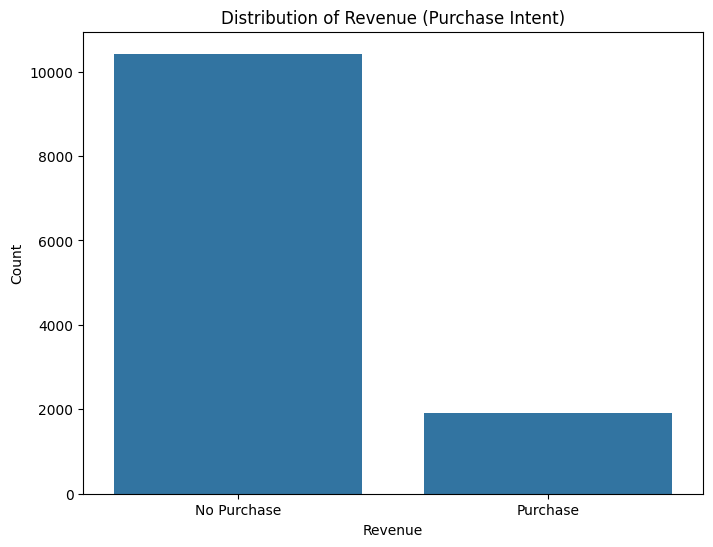

In [5]:
# Analyze the target variable (Revenue)
print(f"Target Variable Distribution:\n{df['Revenue'].value_counts()}")
print(f"Target Variable Distribution (%):\n{df['Revenue'].value_counts(normalize=True) * 100}")

# Visualize the target variable distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='Revenue', data=df)
plt.title('Distribution of Revenue (Purchase Intent)')
plt.xlabel('Revenue')
plt.ylabel('Count')
plt.xticks([0, 1], ['No Purchase', 'Purchase'])
plt.show()

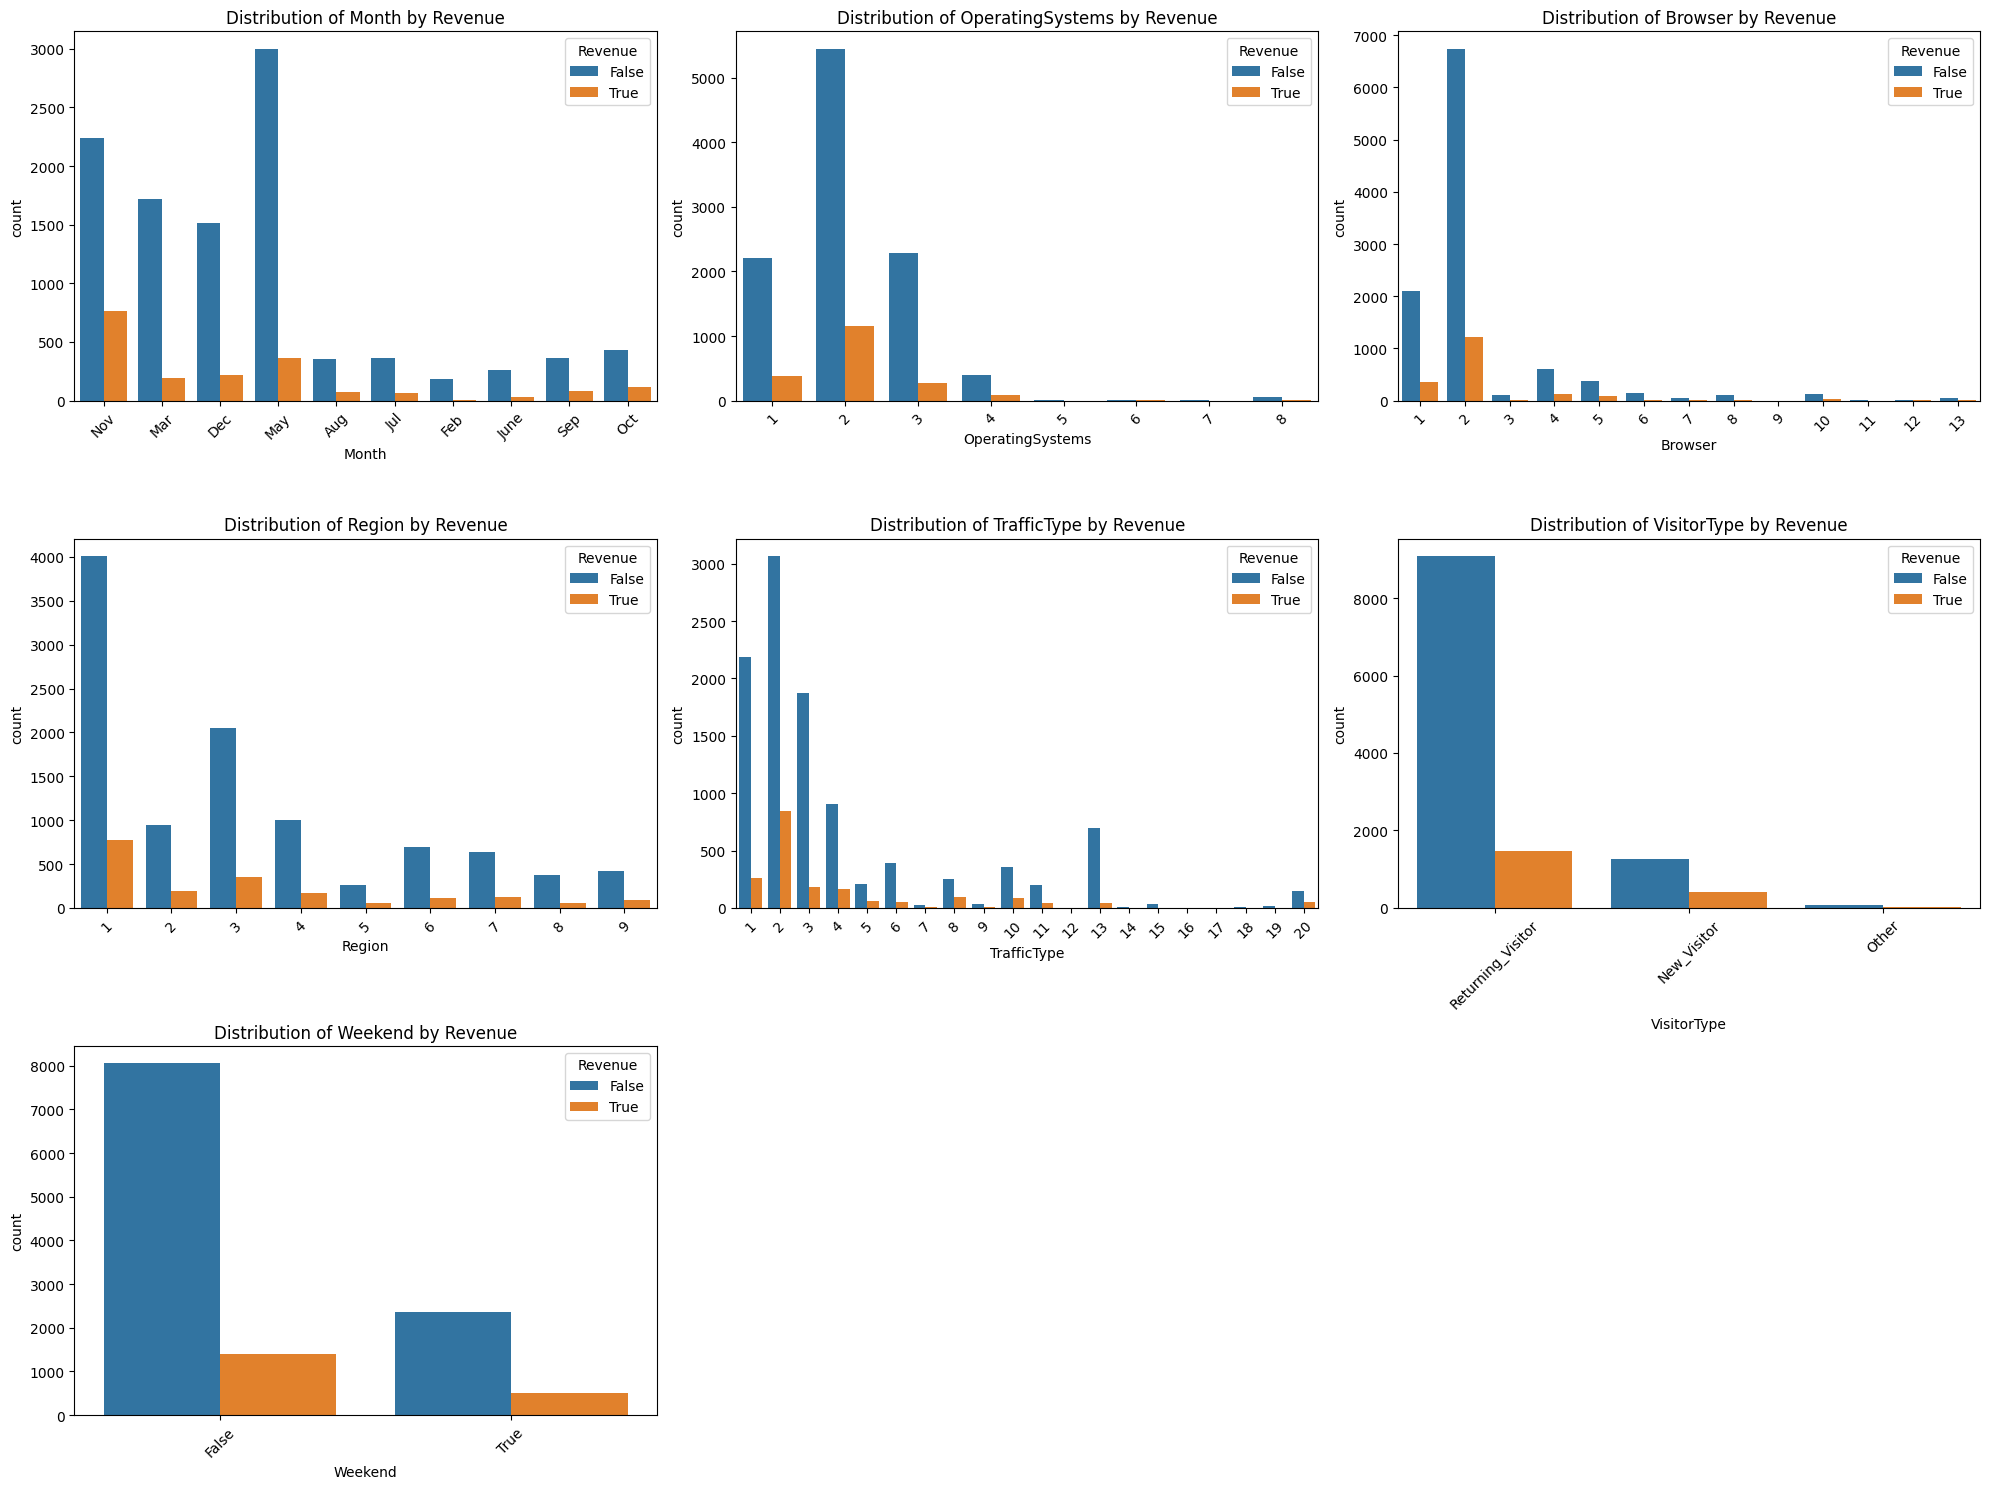


Month vs Revenue:
Revenue      False      True 
Month                        
Aug      82.448037  17.551963
Dec      87.492762  12.507238
Feb      98.369565   1.630435
Jul      84.722222  15.277778
June     89.930556  10.069444
Mar      89.931830  10.068170
May      89.149822  10.850178
Nov      74.649767  25.350233
Oct      79.052823  20.947177
Sep      80.803571  19.196429

OperatingSystems vs Revenue:
Revenue               False      True 
OperatingSystems                      
1                 85.338491  14.661509
2                 82.502651  17.497349
3                 89.510763  10.489237
4                 82.217573  17.782427
5                 83.333333  16.666667
6                 89.473684  10.526316
7                 85.714286  14.285714
8                 78.481013  21.518987

Browser vs Revenue:
Revenue       False      True 
Browser                       
1         85.174655  14.825345
2         84.637608  15.362392
3         95.238095   4.761905
4         82.336957  17.6

In [6]:
# List of categorical features
categorical_features = ['Month', 'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType', 'Weekend']

# Plot distribution of categorical features
plt.figure(figsize=(20, 15))
for i, feature in enumerate(categorical_features):
    plt.subplot(3, 3, i+1)
    sns.countplot(x=feature, data=df, hue='Revenue')
    plt.title(f'Distribution of {feature} by Revenue')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Analyze relationship between categorical features and target
for feature in categorical_features:
    print(f"\n{feature} vs Revenue:")
    print(pd.crosstab(df[feature], df['Revenue'], normalize='index') * 100)

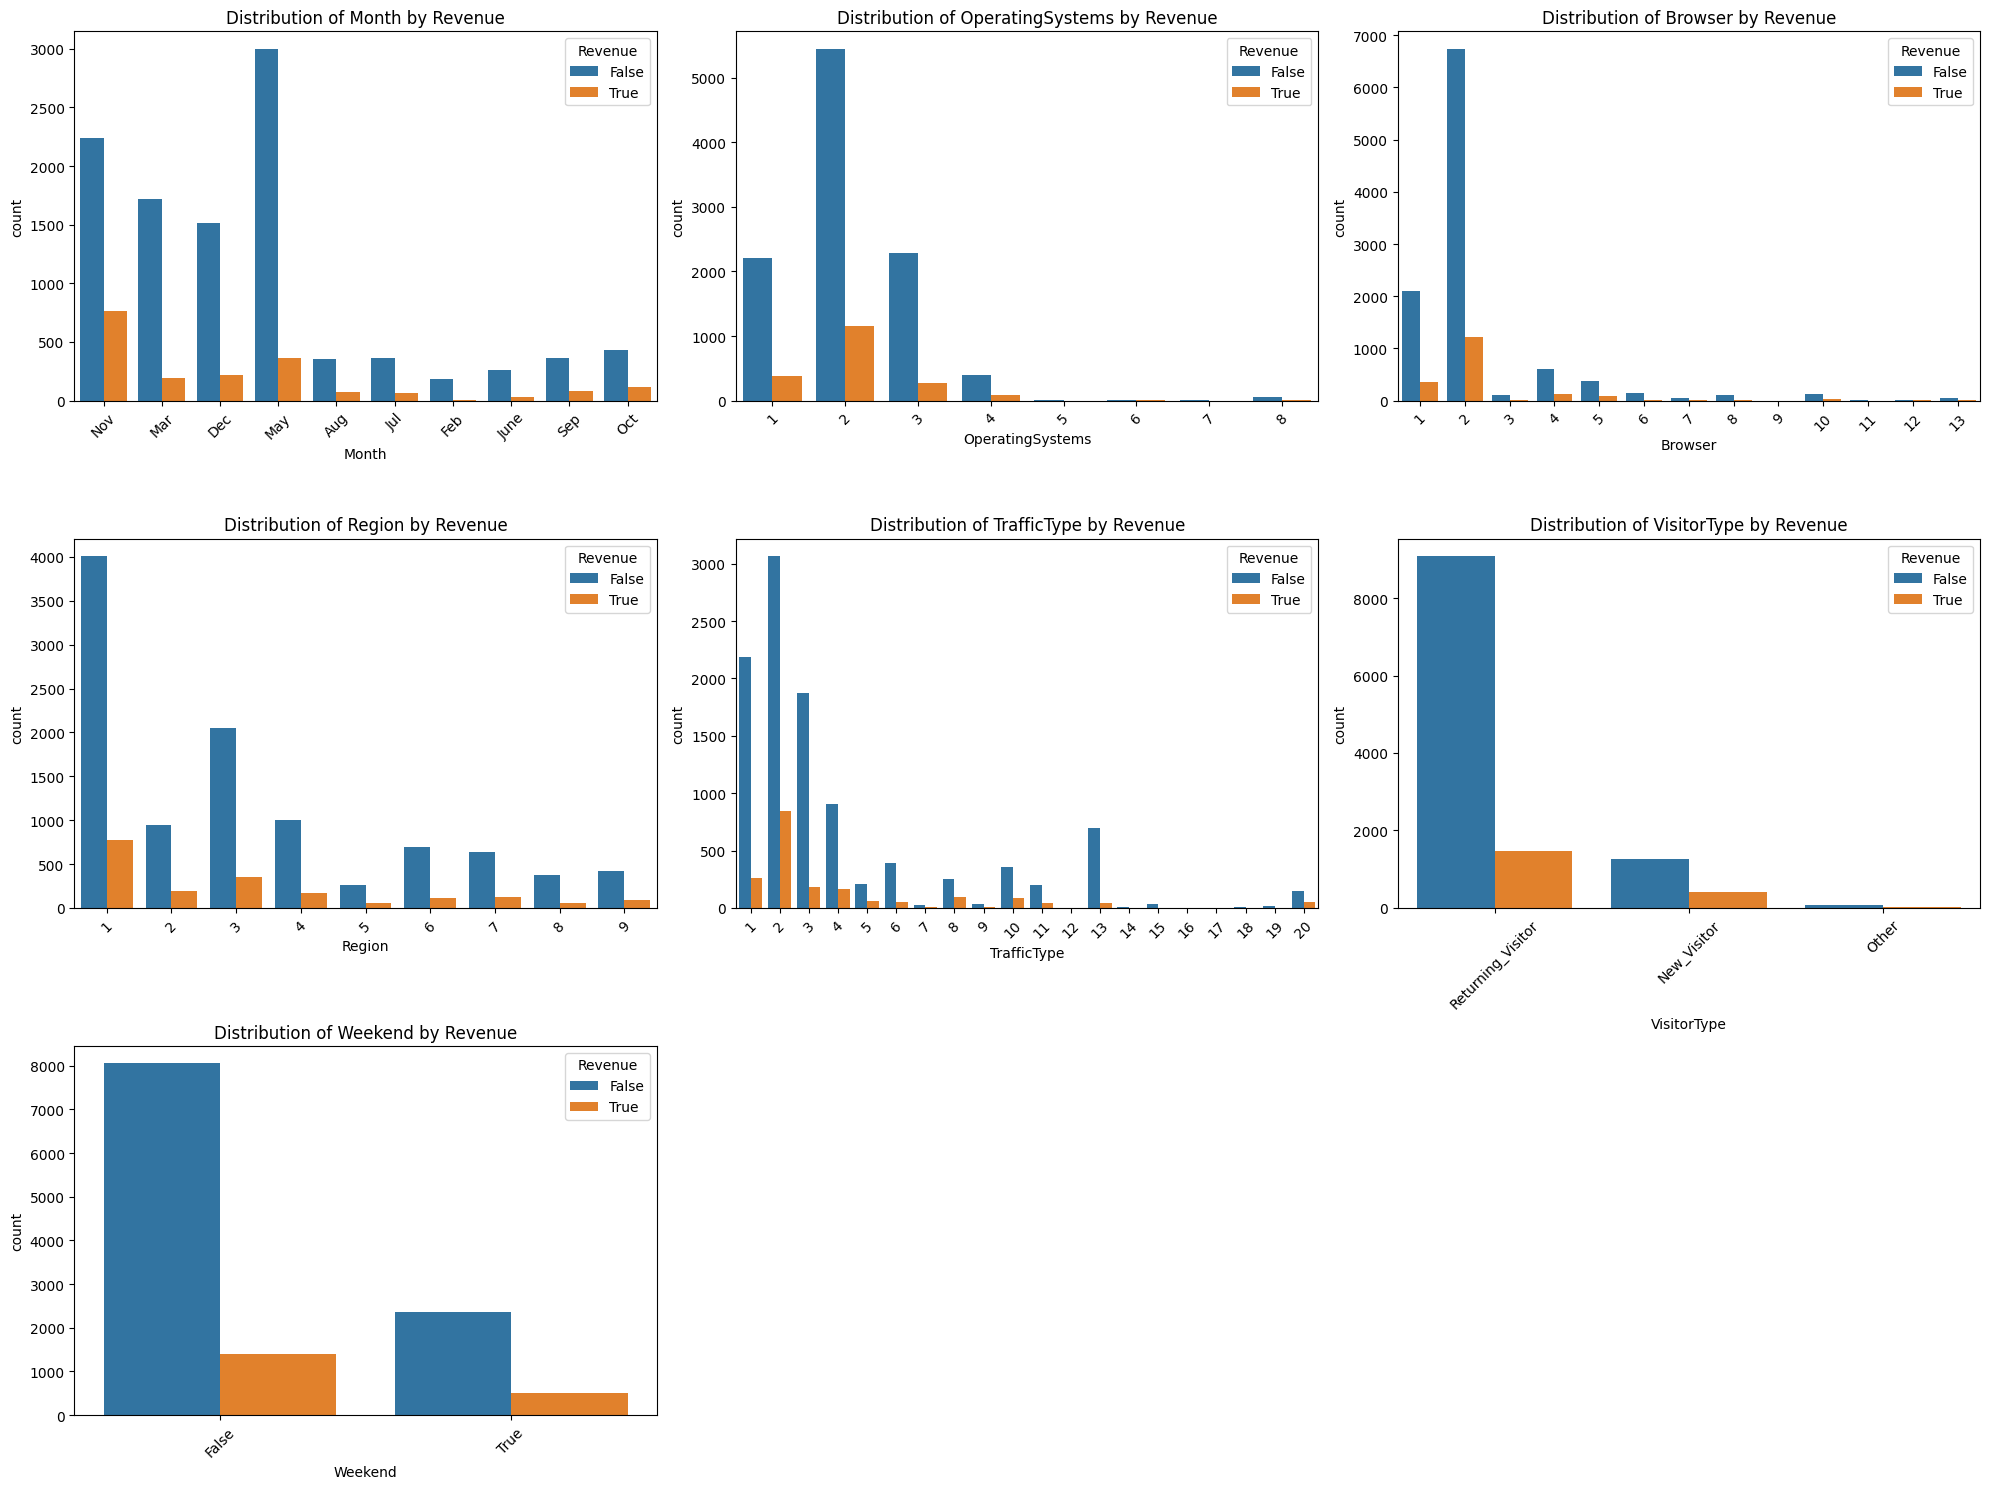


Month vs Revenue:
Revenue      False      True 
Month                        
Aug      82.448037  17.551963
Dec      87.492762  12.507238
Feb      98.369565   1.630435
Jul      84.722222  15.277778
June     89.930556  10.069444
Mar      89.931830  10.068170
May      89.149822  10.850178
Nov      74.649767  25.350233
Oct      79.052823  20.947177
Sep      80.803571  19.196429

OperatingSystems vs Revenue:
Revenue               False      True 
OperatingSystems                      
1                 85.338491  14.661509
2                 82.502651  17.497349
3                 89.510763  10.489237
4                 82.217573  17.782427
5                 83.333333  16.666667
6                 89.473684  10.526316
7                 85.714286  14.285714
8                 78.481013  21.518987

Browser vs Revenue:
Revenue       False      True 
Browser                       
1         85.174655  14.825345
2         84.637608  15.362392
3         95.238095   4.761905
4         82.336957  17.6

In [7]:
# List of categorical features
categorical_features = ['Month', 'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType', 'Weekend']

# Plot distribution of categorical features
plt.figure(figsize=(20, 15))
for i, feature in enumerate(categorical_features):
    plt.subplot(3, 3, i+1)
    sns.countplot(x=feature, data=df, hue='Revenue')
    plt.title(f'Distribution of {feature} by Revenue')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Analyze relationship between categorical features and target
for feature in categorical_features:
    print(f"\n{feature} vs Revenue:")
    print(pd.crosstab(df[feature], df['Revenue'], normalize='index') * 100)

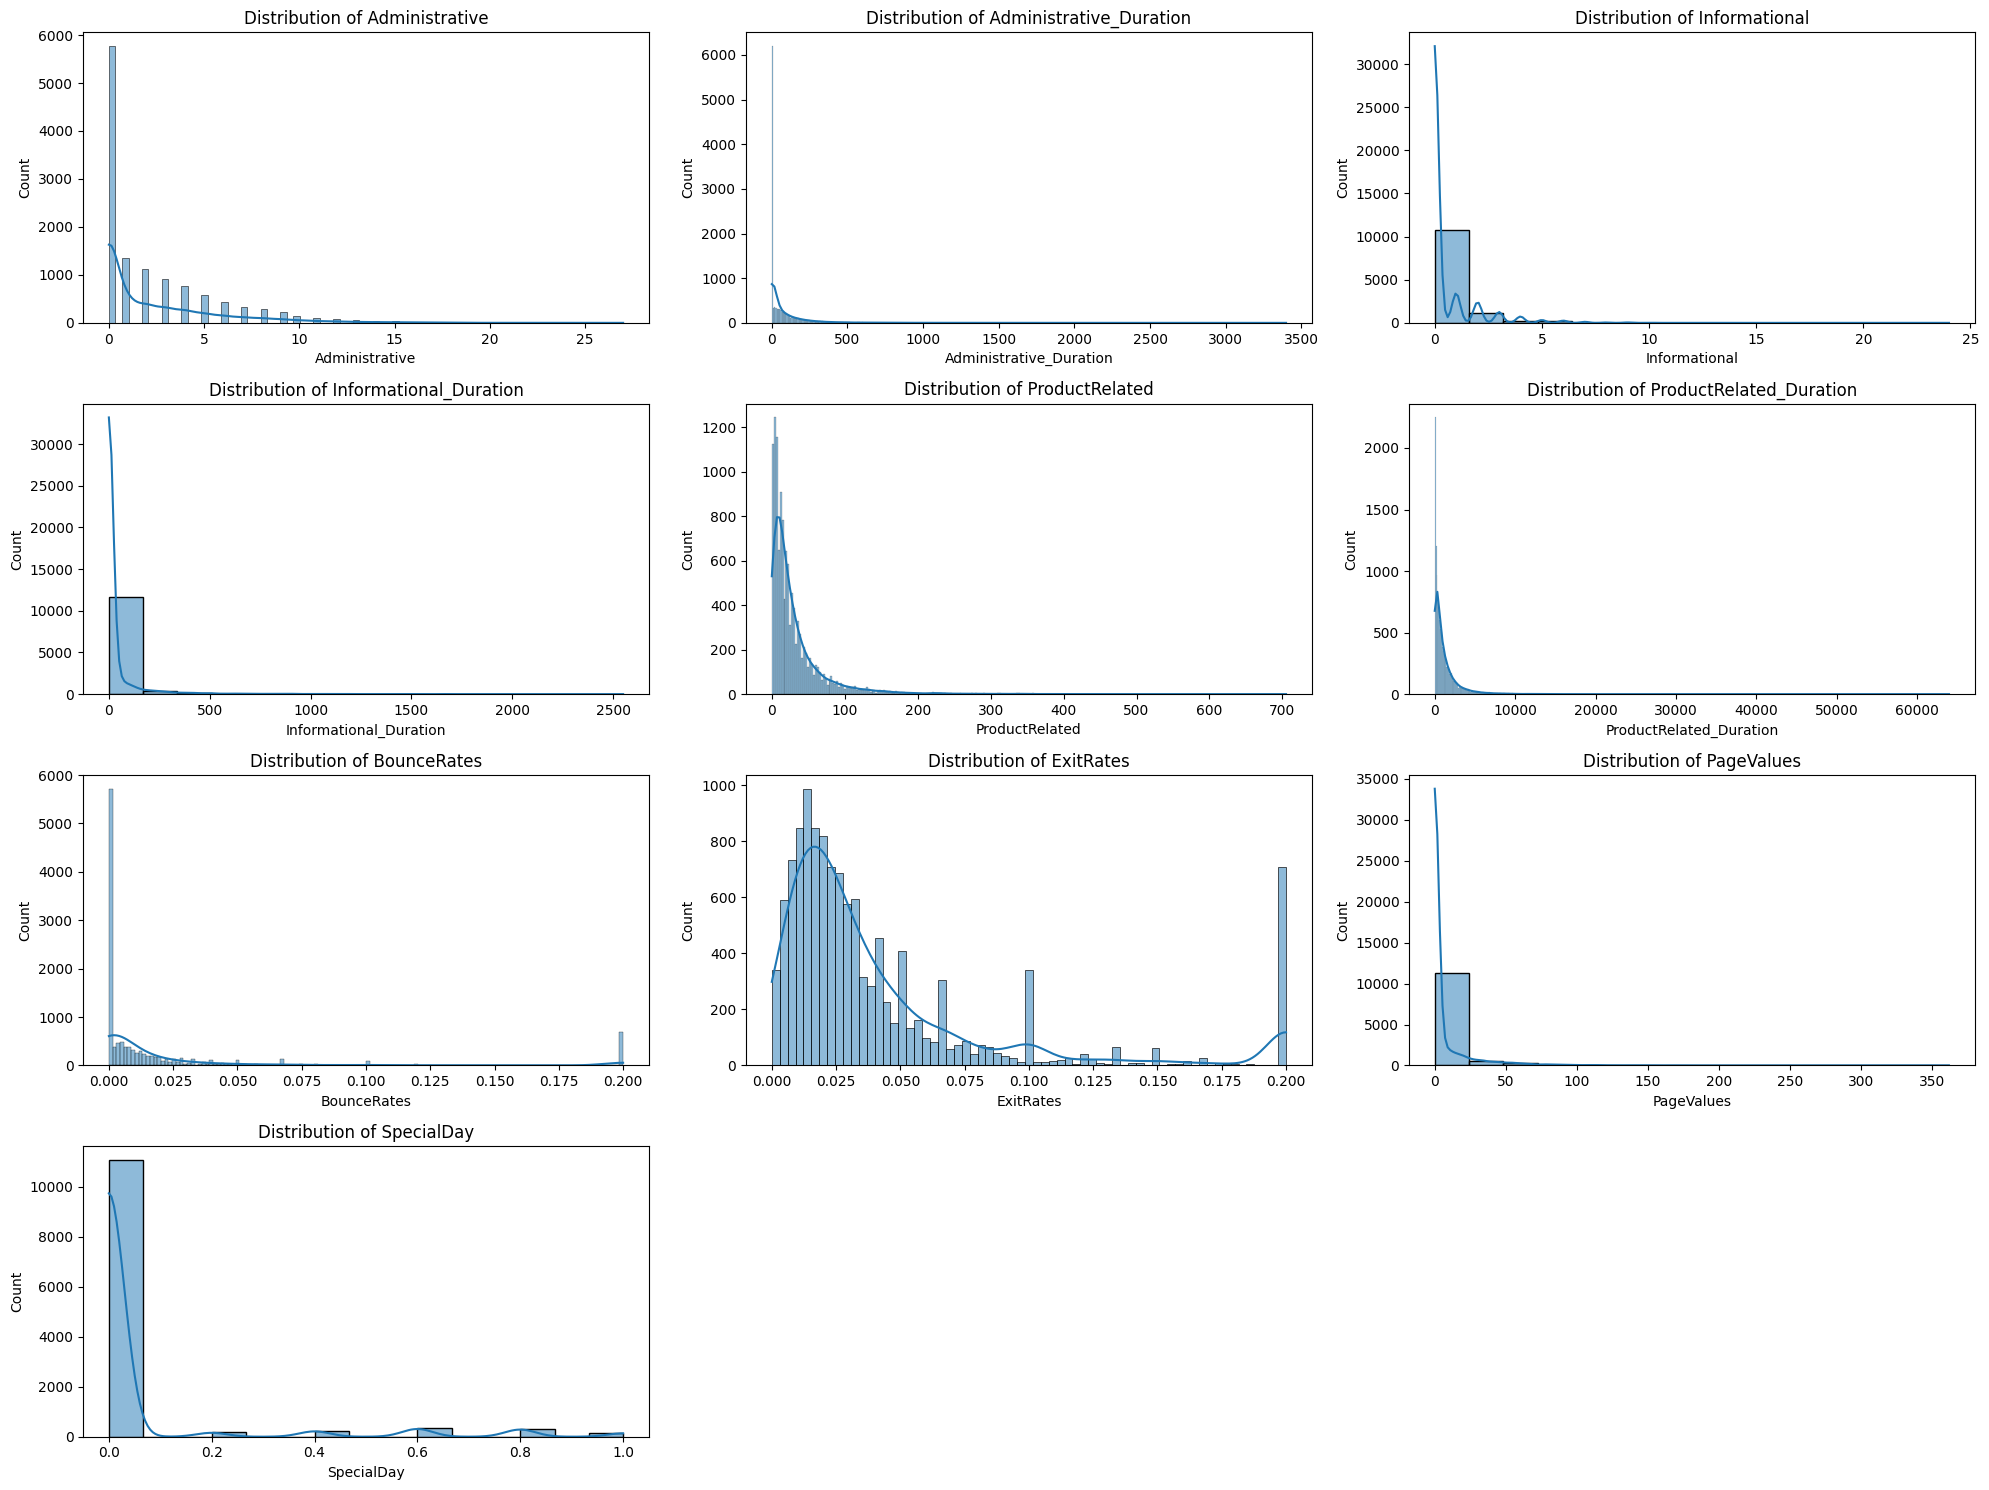

In [8]:
# List of numerical features
numerical_features = ['Administrative', 'Administrative_Duration', 'Informational', 
                      'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
                      'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay']

# Distribution of numerical features
plt.figure(figsize=(20, 15))
for i, feature in enumerate(numerical_features):
    plt.subplot(4, 3, i+1)
    sns.histplot(df[feature], kde=True)
    plt.title(f'Distribution of {feature}')
plt.tight_layout()
plt.show()

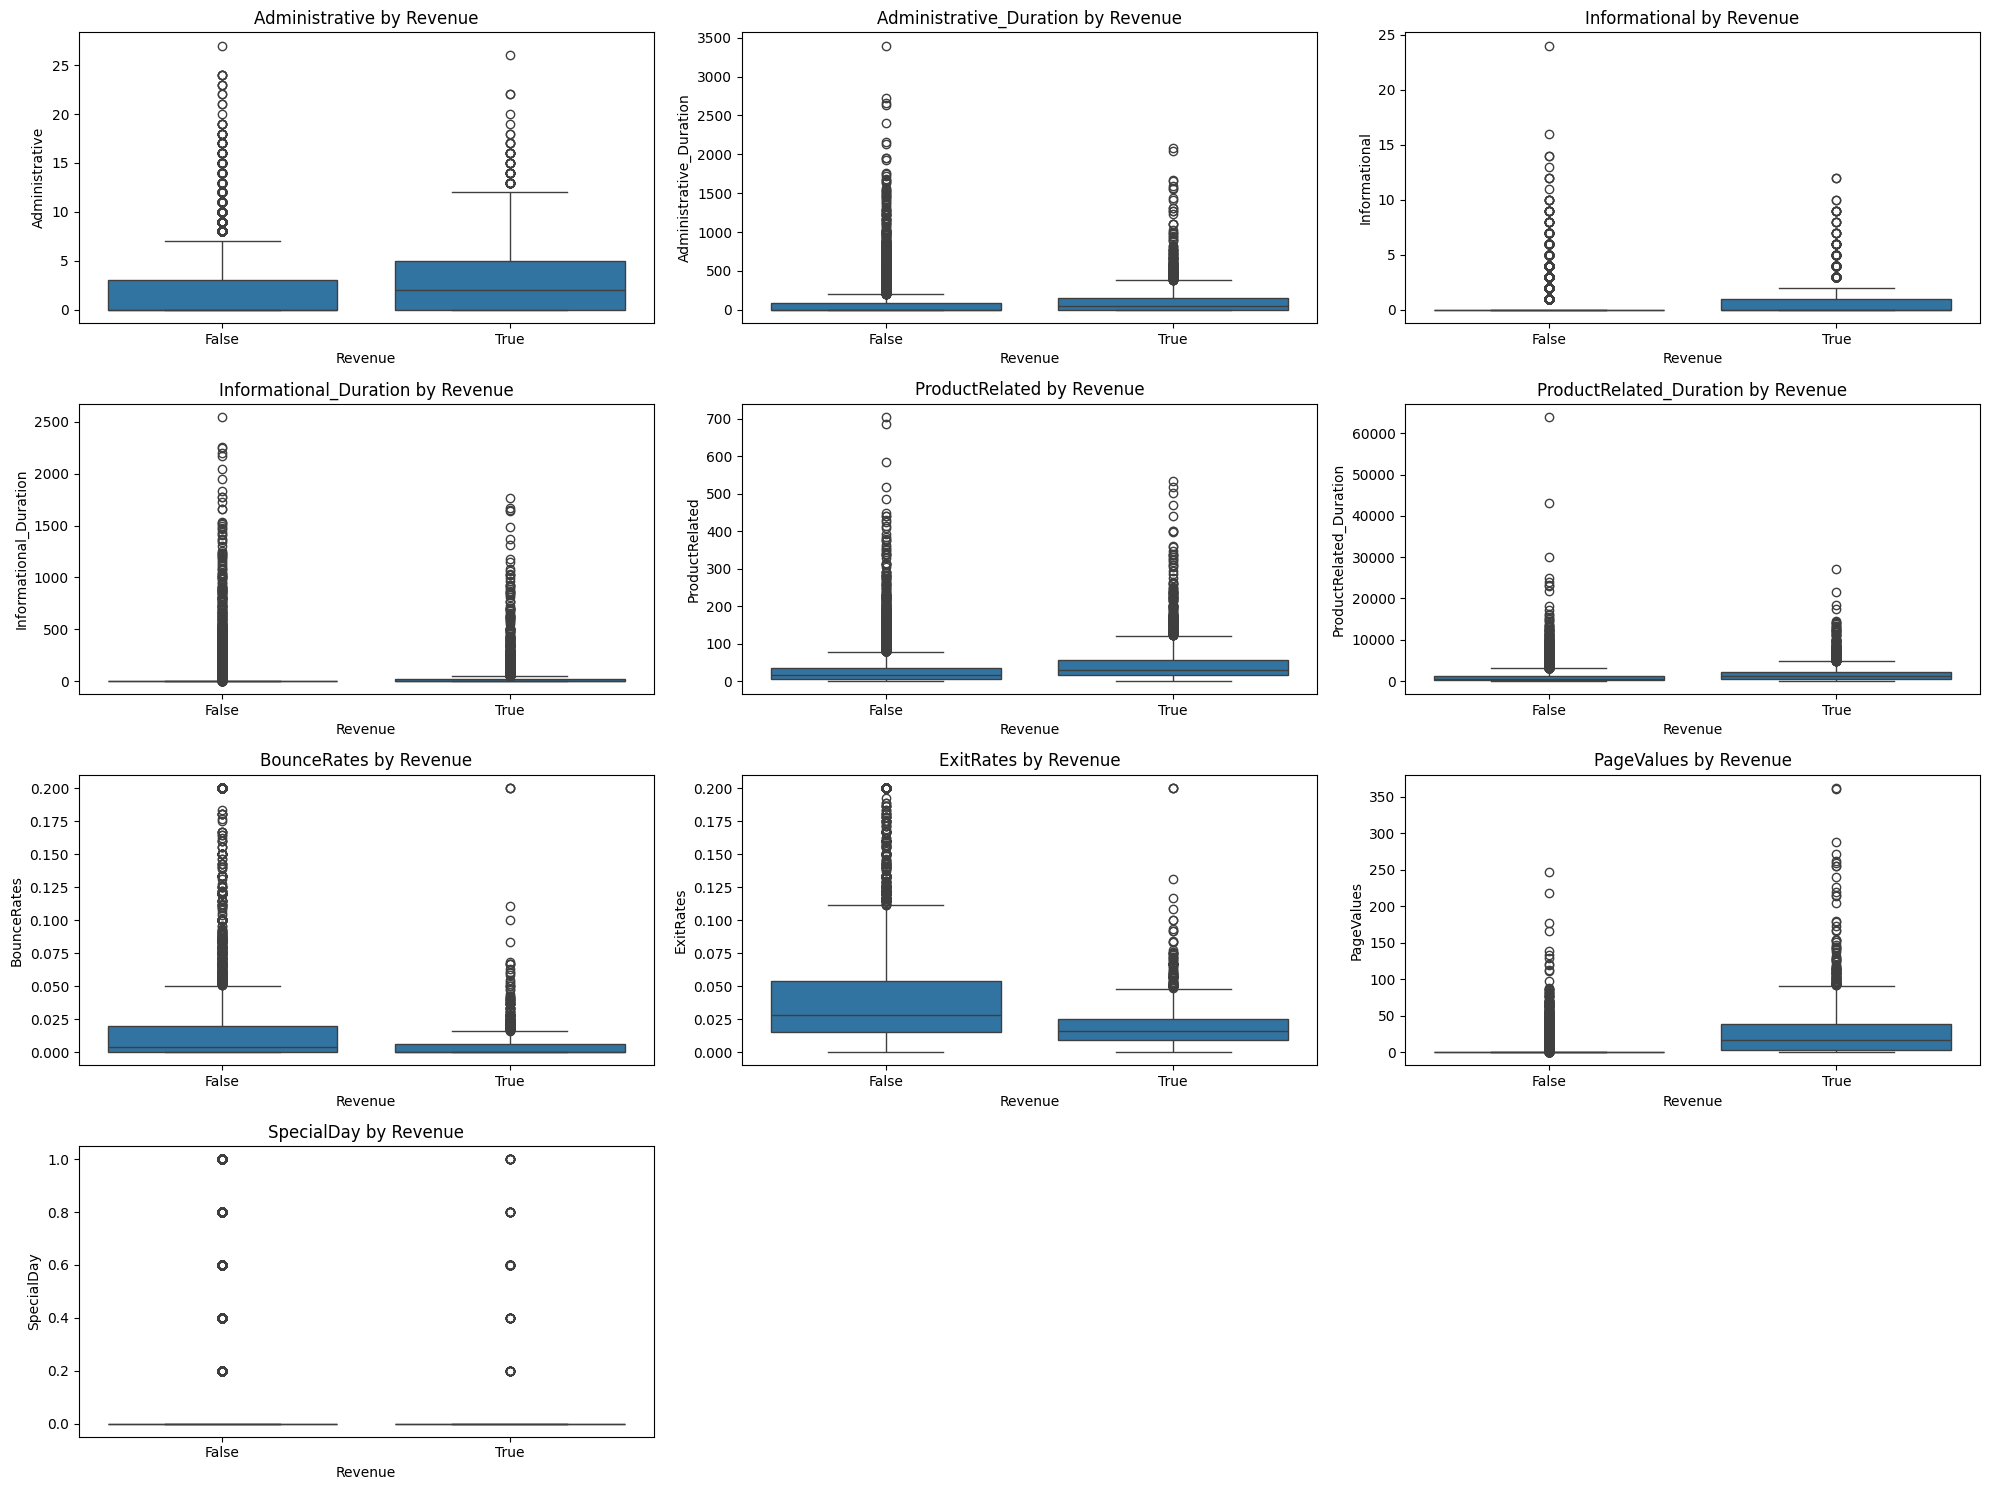

In [9]:
plt.figure(figsize=(20, 15))
for i, feature in enumerate(numerical_features):
    plt.subplot(4, 3, i+1)
    sns.boxplot(x='Revenue', y=feature, data=df)
    plt.title(f'{feature} by Revenue')
plt.tight_layout()
plt.show()

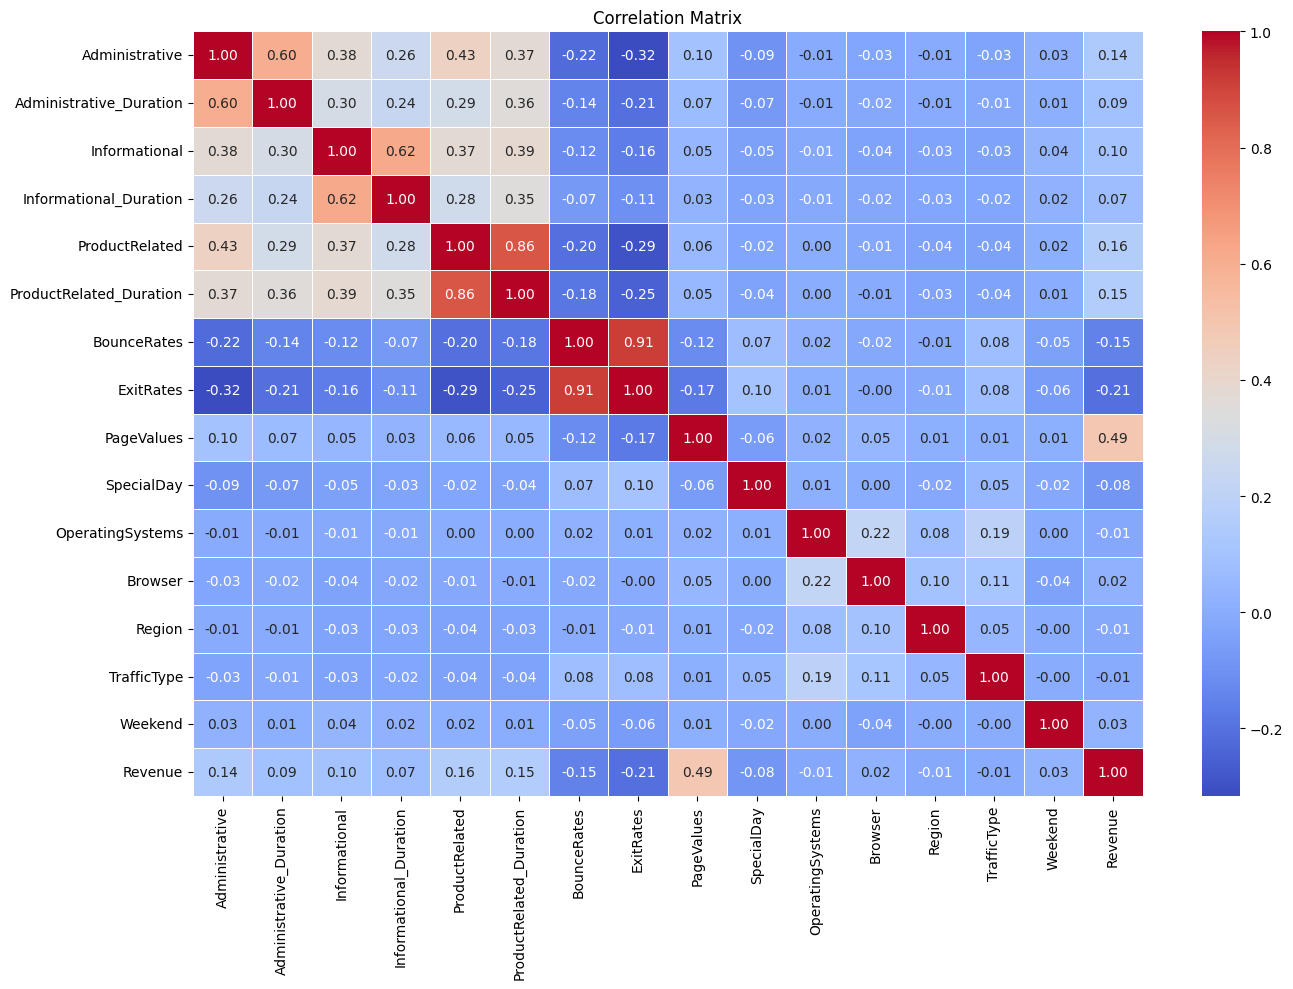

Correlation with Revenue:
Revenue                    1.000000
PageValues                 0.492569
ProductRelated             0.158538
ProductRelated_Duration    0.152373
Administrative             0.138917
Informational              0.095200
Administrative_Duration    0.093587
Informational_Duration     0.070345
Weekend                    0.029295
Browser                    0.023984
TrafficType               -0.005113
Region                    -0.011595
OperatingSystems          -0.014668
SpecialDay                -0.082305
BounceRates               -0.150673
ExitRates                 -0.207071
Name: Revenue, dtype: float64


In [10]:
df_numeric = df.copy()

if df_numeric['Revenue'].dtype == bool:
    df_numeric['Revenue'] = df_numeric['Revenue'].astype(int)
if df_numeric['Weekend'].dtype == bool:
    df_numeric['Weekend'] = df_numeric['Weekend'].astype(int)

numeric_columns = df_numeric.select_dtypes(include=['int64', 'float64']).columns

correlation_matrix = df_numeric[numeric_columns].corr()

plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()

target_correlation = correlation_matrix['Revenue'].sort_values(ascending=False)
print("Correlation with Revenue:")
print(target_correlation)

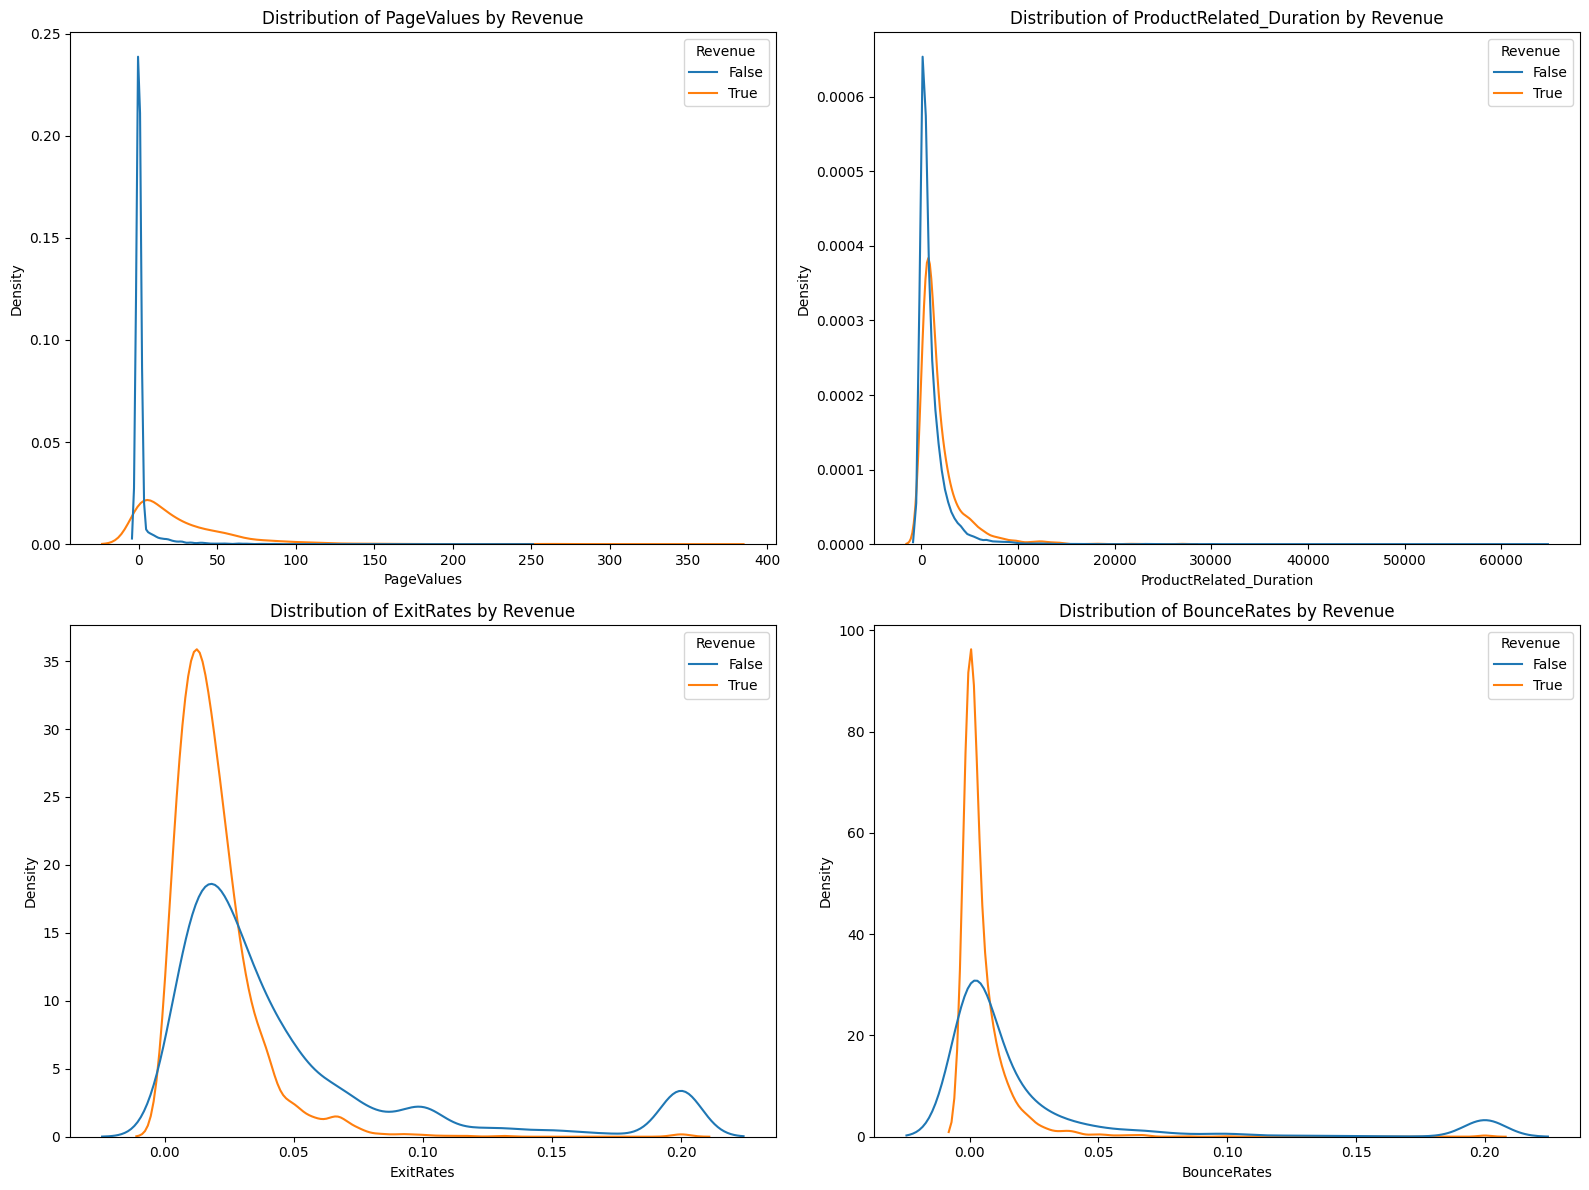

In [11]:
# Compare distributions of top numerical features by target variable
top_features = ['PageValues', 'ProductRelated_Duration', 'ExitRates', 'BounceRates']
plt.figure(figsize=(16, 12))
for i, feature in enumerate(top_features):
    plt.subplot(2, 2, i+1)
    sns.kdeplot(data=df, x=feature, hue='Revenue', common_norm=False)
    plt.title(f'Distribution of {feature} by Revenue')
plt.tight_layout()
plt.show()

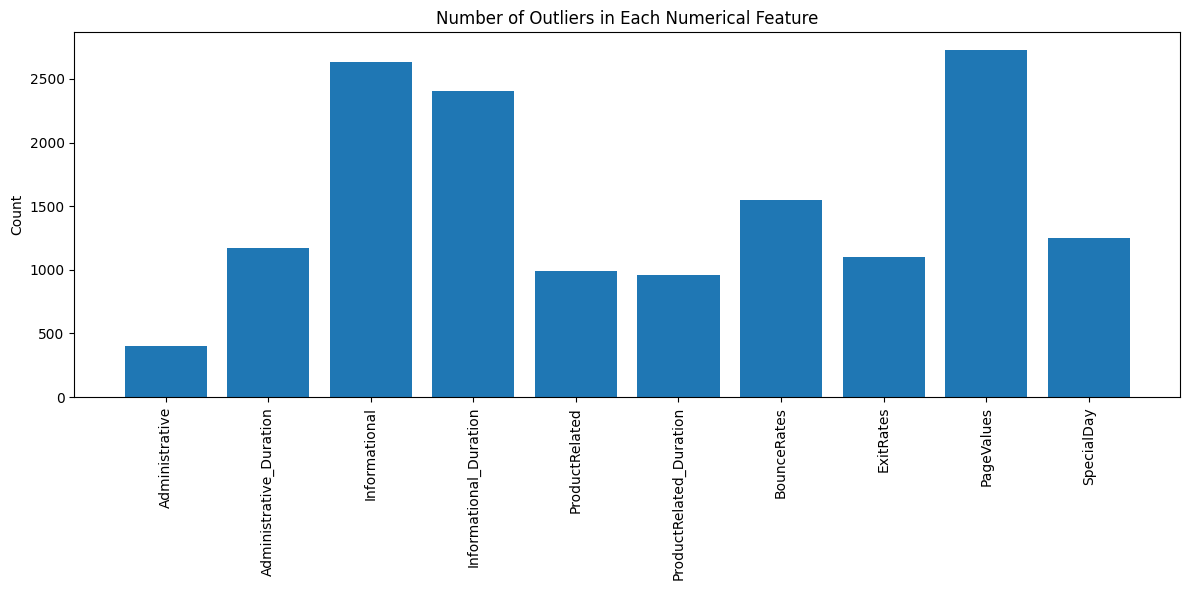

In [12]:
def detect_outliers(df, feature):
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[feature] < lower_bound) | (df[feature] > upper_bound)][feature]
    return outliers.count()

outliers_count = {}
for feature in numerical_features:
    outliers_count[feature] = detect_outliers(df, feature)

plt.figure(figsize=(12, 6))
plt.bar(outliers_count.keys(), outliers_count.values())
plt.title('Number of Outliers in Each Numerical Feature')
plt.xticks(rotation=90)
plt.ylabel('Count')
plt.tight_layout()
plt.show()

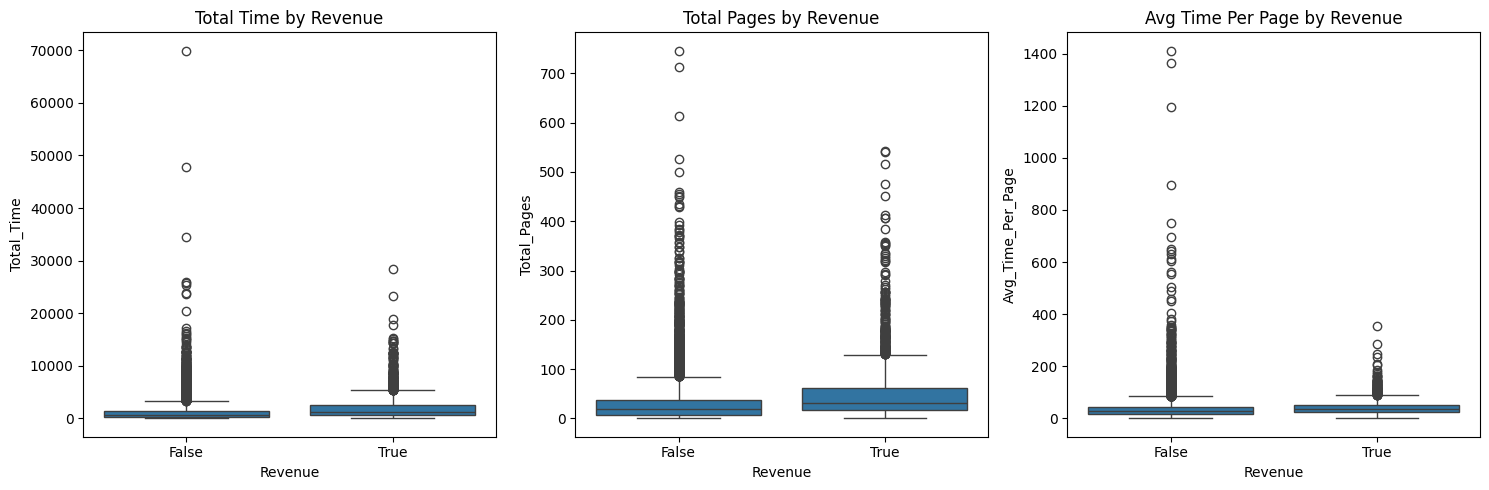

In [13]:
df['Total_Time'] = df['Administrative_Duration'] + df['Informational_Duration'] + df['ProductRelated_Duration']
df['Total_Pages'] = df['Administrative'] + df['Informational'] + df['ProductRelated']
df['Avg_Time_Per_Page'] = df['Total_Time'] / df['Total_Pages'].replace(0, 1)  # Avoid division by zero

plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
sns.boxplot(x='Revenue', y='Total_Time', data=df)
plt.title('Total Time by Revenue')

plt.subplot(1, 3, 2)
sns.boxplot(x='Revenue', y='Total_Pages', data=df)
plt.title('Total Pages by Revenue')

plt.subplot(1, 3, 3)
sns.boxplot(x='Revenue', y='Avg_Time_Per_Page', data=df)
plt.title('Avg Time Per Page by Revenue')
plt.tight_layout()
plt.show()

Visitor Type Statistics:
         VisitorType   Revenue  PageValues  BounceRates  ExitRates  \
0        New_Visitor  0.249115   10.772187     0.005261   0.020681   
1              Other  0.188235   18.191812     0.038551   0.063349   
2  Returning_Visitor  0.139323    5.006176     0.024778   0.046505   

   Administrative  Informational  ProductRelated  
0        2.551948       0.333530       18.054900  
1        1.470588       0.176471       12.470588  
2        2.283954       0.533504       34.082457  


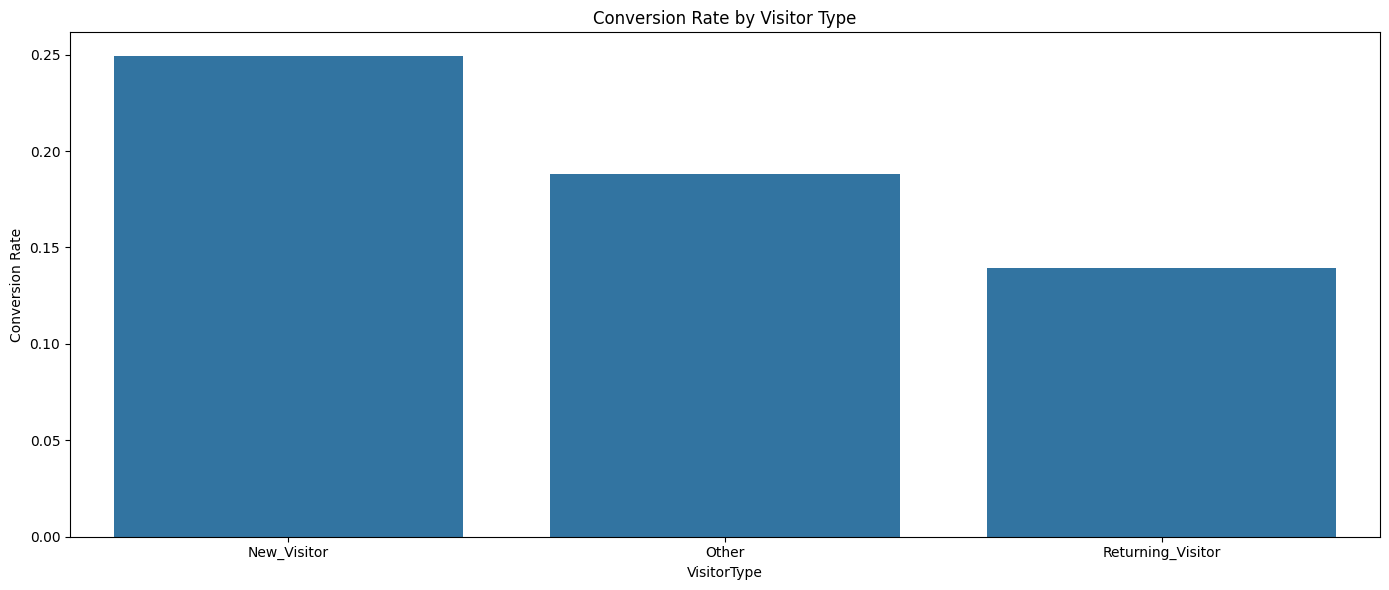

In [14]:
visitor_type_stats = df.groupby('VisitorType').agg({
    'Revenue': 'mean',
    'PageValues': 'mean',
    'BounceRates': 'mean',
    'ExitRates': 'mean',
    'Administrative': 'mean',
    'Informational': 'mean',
    'ProductRelated': 'mean'
}).reset_index()

print("Visitor Type Statistics:")
print(visitor_type_stats)

plt.figure(figsize=(14, 6))
sns.barplot(x='VisitorType', y='Revenue', data=visitor_type_stats)
plt.title('Conversion Rate by Visitor Type')
plt.ylabel('Conversion Rate')
plt.tight_layout()
plt.show()

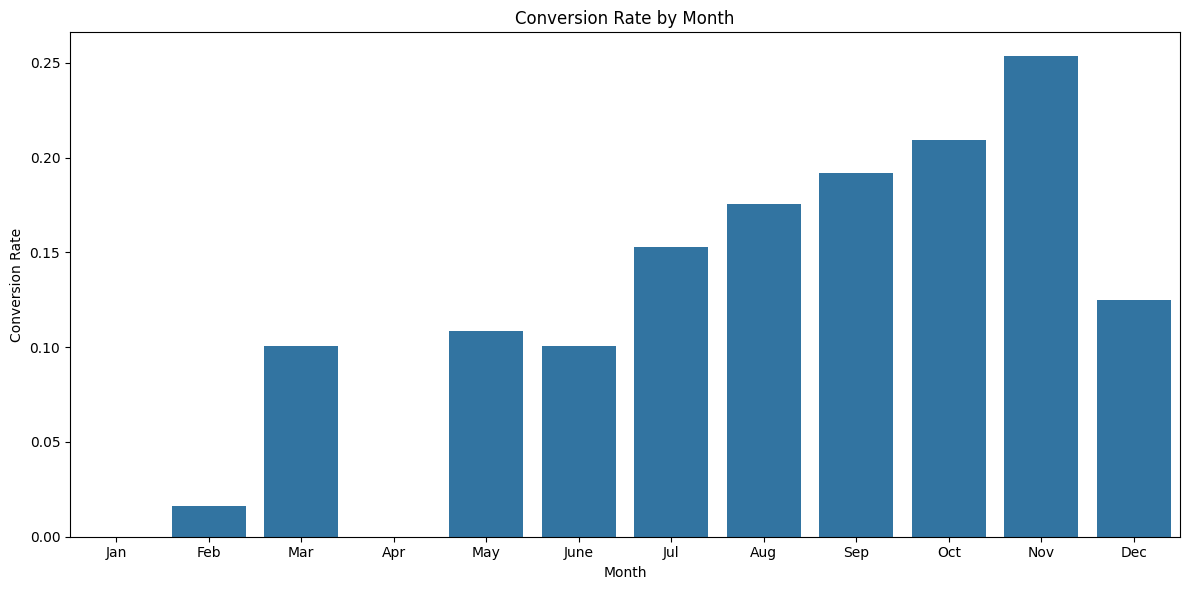

Weekend vs Weekday Statistics:
   Weekend   Revenue  PageValues  BounceRates  ExitRates
0    False  0.148911    5.766571     0.023433   0.044747
1     True  0.173989    6.294020     0.018095   0.037549


In [15]:
month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'June', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
month_stats = df.groupby('Month').agg({
    'Revenue': 'mean'
}).reset_index()

month_stats['Month'] = pd.Categorical(month_stats['Month'], categories=month_order, ordered=True)
month_stats = month_stats.sort_values('Month')

plt.figure(figsize=(12, 6))
sns.barplot(x='Month', y='Revenue', data=month_stats)
plt.title('Conversion Rate by Month')
plt.ylabel('Conversion Rate')
plt.tight_layout()
plt.show()

weekend_stats = df.groupby('Weekend').agg({
    'Revenue': 'mean',
    'PageValues': 'mean',
    'BounceRates': 'mean',
    'ExitRates': 'mean'
}).reset_index()

print("Weekend vs Weekday Statistics:")
print(weekend_stats)